# High Frequency Words
### Team: The p < 0.05 Team - Haig Bedros, Noori Selina, Julia Ferris, Matthew Roland

Please answer the following questions in an IPython Notebook, posted to GitHub.

1. **Choose a corpus of interest.**

2. **How many total unique words are in the corpus?**
   - Please feel free to define unique words in any interesting, defensible way.

3. **Taking the most common words, how many unique words represent half of the total words in the corpus?**

4. **Identify the 200 highest frequency words in this corpus.**

5. **Create a graph that shows the relative frequency of these 200 words.**

6. **Does the observed relative frequency of these words follow Zipf’s law? Explain.**

7. **In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora”?**


# High Frequency Words Analysis

## 1. Choose a corpus of interest
We will use "Pride and Prejudice" by Jane Austen which is publicly available text dataset, and download it directly using requests. 
We'll analyze the text to find the number of unique words and the most common words.

In [169]:
import requests

# The text from Project Gutenberg
url = 'http://www.gutenberg.org/files/1342/1342-0.txt'
response = requests.get(url)
text = response.text

print(text[:500])

*** START OF THE PROJECT GUTENBERG EBOOK 1342 ***




                            [Illustration:

                             GEORGE ALLEN
                               PUBLISHER

                        156 CHARING CROSS ROAD
                                LONDON

                             RUSKIN HOUSE
                                   ]

                            [Illustration:

               _Reading Janeâs Letters._      _Chap 34._
                             


## 2. How many total unique words are in the corpus?

To count the number of unique words, we need to:
1. Convert all words to lowercase to make the counting case-insensitive.
2. And remove any non-alphabetic characters (like punctuation).

In [170]:
# Convert to lowercase
words = text.lower().split()

# Remove punctuation
cleaned_words = [''.join(char for char in word if char.isalpha()) for word in words]

# We use set here to store unique words because set does not allow duplicate entries.
unique_words = set(cleaned_words)

# Remove empty strings
unique_words.discard('')

# Count unique words
num_unique_words = len(unique_words)

print(f"There are {num_unique_words} unique words in 'Pride and Prejudice'")

There are 8269 unique words in 'Pride and Prejudice'


## 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

Here's what we do:

1. We calculate the total number of words in the corpus.
2. Then sort the words by their frequency in descending order.
3. Sum the frequencies of the most common words until we reach half of the total number of words.
4. Finally, we count how many unique words it took to reach that sum.

In [171]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

stop_words = set(stopwords.words('english'))  # Get stop words

# Add any additional stop words you want to exclude
additional_stop_words = {'mr', 'mrs', 'miss', 'said', 'could', 'would', 'though', 'must', 'much', 'âi', 'one'}
stop_words.update(additional_stop_words)

# Filter out stop words
filtered_words = [word for word in cleaned_words if word.lower() not in stop_words]

word_counts = Counter(filtered_words)  # Count word frequencies

total_words = sum(word_counts.values())  # Total words
half_total_words = total_words / 2  # Half of total words

cumulative_sum = 0
unique_words_count = 0

# Find unique words representing half the total words
for word, frequency in word_counts.most_common():
    cumulative_sum += frequency
    unique_words_count += 1
    if cumulative_sum >= half_total_words:
        break

print(f'Number of unique words representing half of the total words: {unique_words_count}')

Number of unique words representing half of the total words: 423


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haigbedros/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 4. Identify the 200 highest frequency words in this corpus.

In [172]:
# Frequency of each word, excluding stop words
word_counts = {}
for word in cleaned_words:
    if word and word.lower() not in stop_words:  # count non-empty, non-stop words
        word_counts[word] = word_counts.get(word, 0) + 1

# 200 most common words
most_common_words = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200]

print("200 Most Common Words in 'Pride and Prejudice' (excluding stop words):")
for word, frequency in most_common_words:
    print(f'{word}: {frequency}')

200 Most Common Words in 'Pride and Prejudice' (excluding stop words):
elizabeth: 599
darcy: 358
bennet: 290
jane: 261
bingley: 246
know: 237
never: 229
think: 216
soon: 214
might: 203
time: 198
may: 198
little: 189
well: 186
every: 185
nothing: 182
lady: 179
without: 173
sister: 172
make: 171
illustration: 163
wickham: 161
collins: 160
good: 160
first: 159
shall: 159
see: 152
say: 151
great: 146
dear: 146
family: 146
two: 143
man: 141
however: 135
made: 131
young: 131
ever: 128
give: 127
lydia: 126
day: 125
always: 124
hope: 121
many: 119
us: 119
last: 116
long: 115
catherine: 114
away: 114
cannot: 113
thought: 112
letter: 111
father: 111
enough: 110
way: 107
felt: 106
mother: 106
room: 106
house: 104
replied: 103
friend: 102
go: 101
saw: 101
âyou: 100
quite: 98
wish: 98
till: 95
sure: 95
even: 94
love: 93
came: 92
âand: 92
better: 91
often: 91
cried: 91
come: 90
manner: 90
pleasure: 90
really: 89
chapter: 89
feelings: 88
like: 87
heard: 87
believe: 86
done: 86
longbourn: 85
subject: 

## 5. Create a graph that shows the relative frequency of these 200 words.
We will use wordcloud to visualize the frequencies of the most common words.

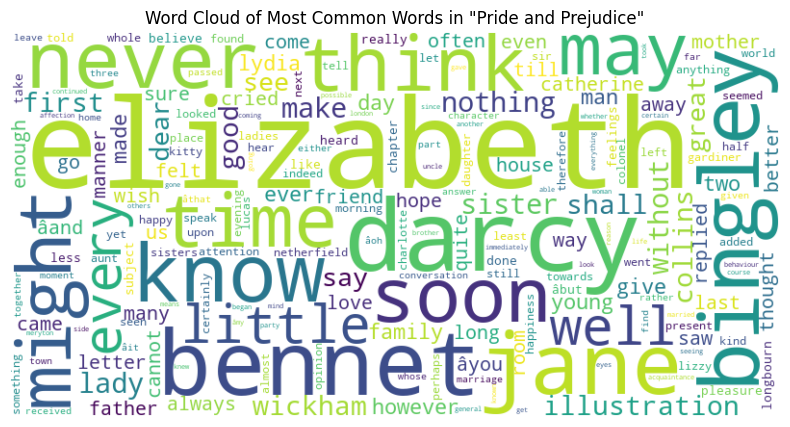

In [173]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in "Pride and Prejudice"')
plt.show()


## 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zip's law says that if you look at the most common words in "Pride and Prejudice" and rank them by how often they appear, the word that appears most frequently should appear about twice as often as the second most frequent word, three times as often as the third most frequent word, and so on.

To check that, we would:

Rank the words by their frequency and then compare the frequencies.

In [174]:
# Sort words by their frequency in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

# Display the sorted words by their frequency
print("Words ranked by their frequency (excluding stop words):")
for rank, (word, frequency) in enumerate(sorted_word_counts[:5], start=1):
    print(f'{word} - {frequency}')

Words ranked by their frequency (excluding stop words):
elizabeth - 599
darcy - 358
bennet - 290
jane - 261
bingley - 246


The given frequencies in show a decreasing trend with rank but do not strictly adhere to Zipf's law.

## 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora”?
"Pride and Prejudice" focuses on specific themes like love and social status, leading to different common words. It frequently uses character names like "Elizabeth" and "Darcy." Jane Austen's unique language and formal style influence word frequency. The historical context includes more archaic terms and formal expressions compared to modern corpora.